**Problem Statement: Predicting Credit Risk for Loan Applicants**

Background: Financial institutions face significant challenges in assessing the creditworthiness of loan applicants. Accurate credit risk prediction is crucial for minimizing defaults and ensuring the stability of the lending system. The German Credit dataset provides a comprehensive set of features related to applicants' financial history, personal information, and loan details, making it an ideal resource for developing predictive models.

Objective:Develop a machine learning model to predict the credit risk of loan applicants using the German Credit dataset. The model should classify applicants into two categories: good credit risk and bad credit risk. Additionally, provide insights into the key factors influencing credit risk and suggest strategies for improving the credit evaluation process. 

*Requirements:*

Data Exploration and Preprocessing:
Analyze the dataset to understand the distribution of features and target variable.
Handle missing values, outliers, and perform necessary data cleaning.
Engineer new features that could enhance model performance.

Model Development:
Select appropriate machine learning algorithms for classification.
Train and validate the model using suitable evaluation metrics (e.g., accuracy, precision, recall, F1-score).
Optimize the model through techniques such as hyperparameter tuning and cross-validation.

Model Interpretation and Insights:
Interpret the model's predictions and identify the most influential features.
Create visualizations to communicate findings effectively.
Provide actionable insights and recommendations for improving the credit evaluation process.

Presentation:
Prepare a comprehensive report detailing the methodology, results, and conclusions. Explain why the implemented approach was selected.
You may use streamlit for UI.Submit the recording of the demo with voice over of what has been achieved along with the code.

**1. Problem Definition**

🧠 1. Problem Definition
Goal: Predict whether a loan applicant is a good or bad credit risk using the German Credit dataset.

Type of Problem: Binary classification

Impact: Helps financial institutions reduce default risk and improve credit approval processes.



**2. Data Collection**

As it is mentioned in the problem statement, we are going to use the German Credit Dataset. 

This dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes.

It is almost impossible to understand the original dataset due to its complicated system of categories and symbols. Thus, a small Python script was written to convert it into a readable CSV file. Some attributes were discarded as they are not important. The selected attributes are:

1. Age (numeric)
2. Sex (text: male, female)
3. Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
4. Housing (text: own, rent, or free)
5. Saving accounts (text - little, moderate, quite rich, rich)
6. Checking account (numeric, in DM - Deutsch Mark)
7. Credit amount (numeric, in DM)
8. Duration (numeric, in month)
9. Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

The target variable is Credit Risk, where 1 indicates a Good credit risk and 0 indicates a Bad credit risk.

In [1]:
# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Data manipulation libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib
matplotlib.use('Agg')  # Ensure compatibility in certain environments
import matplotlib.pyplot as plt
plt.switch_backend('Agg')
%matplotlib inline
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Set a style for seaborn
sns.set(style='whitegrid')

# Display options for pandas
pd.set_option('display.max_columns', 100)

In [2]:
# Load the dataset
data_path = 'german_credit_data.csv'
df = pd.read_csv(data_path, encoding='ascii', delimiter=',')

# Display the first few rows
print('Sample Data:')
print(df.head())

# Display basic information about the dataset
print('\nDataFrame Info:')
print(df.info())

# Display summary statistics
print('\nSummary Statistics:')
print(df.describe(include='all'))

Sample Data:
   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  
0           1169         6             radio/TV  
1           5951        48             radio/TV  
2           2096        12            education  
3           7882        42  furniture/equipment  
4           4870        24                  car  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0

**3. Data Preprocessing**

In [3]:
# Drop the unnecessary 'Unnamed: 0' column if present
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

# Check for missing values
print('Missing values per column:')
print(df.isnull().sum())

# Convert categorical variables to type 'category' if needed
categorical_columns = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Verify data types
print('\nData Types:')
print(df.dtypes)

Missing values per column:
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

Data Types:
Age                    int64
Sex                 category
Job                    int64
Housing             category
Saving accounts     category
Checking account    category
Credit amount          int64
Duration               int64
Purpose             category
dtype: object


**4. Exploratory Data Analysis**

We now dive into the EDA part to uncover interesting patterns. We will generate various plots:

A heatmap to analyze correlations among numeric variables (if there are four or more numeric columns).
Pair plots to observe relationships between pairs of numeric features.
Histograms for distributions.
Countplots to visualize the frequency of categorical variables.
Bar, box, boxen, violin, and strip plots to examine distributions and differences across categories.
These visualizations help us understand the data better and potentially detect anomalies or patterns worth further investigation.

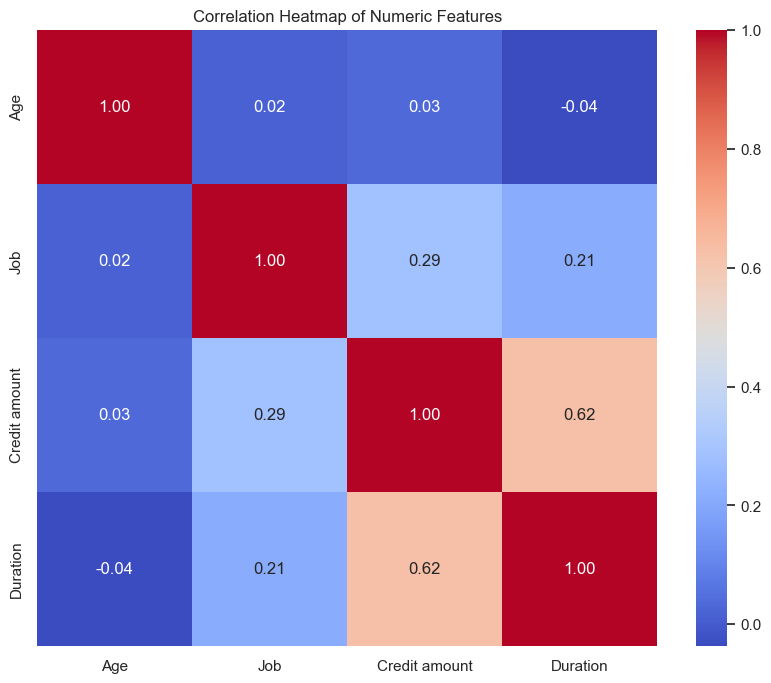

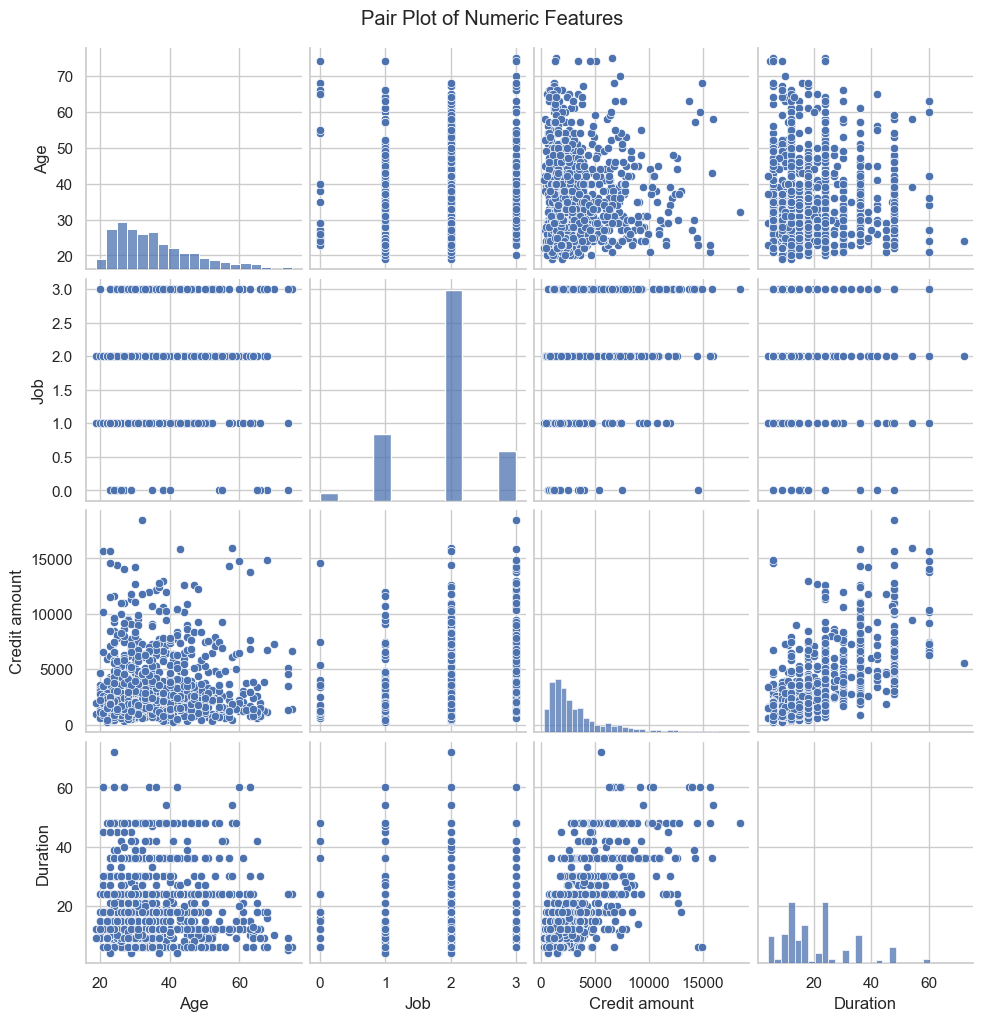

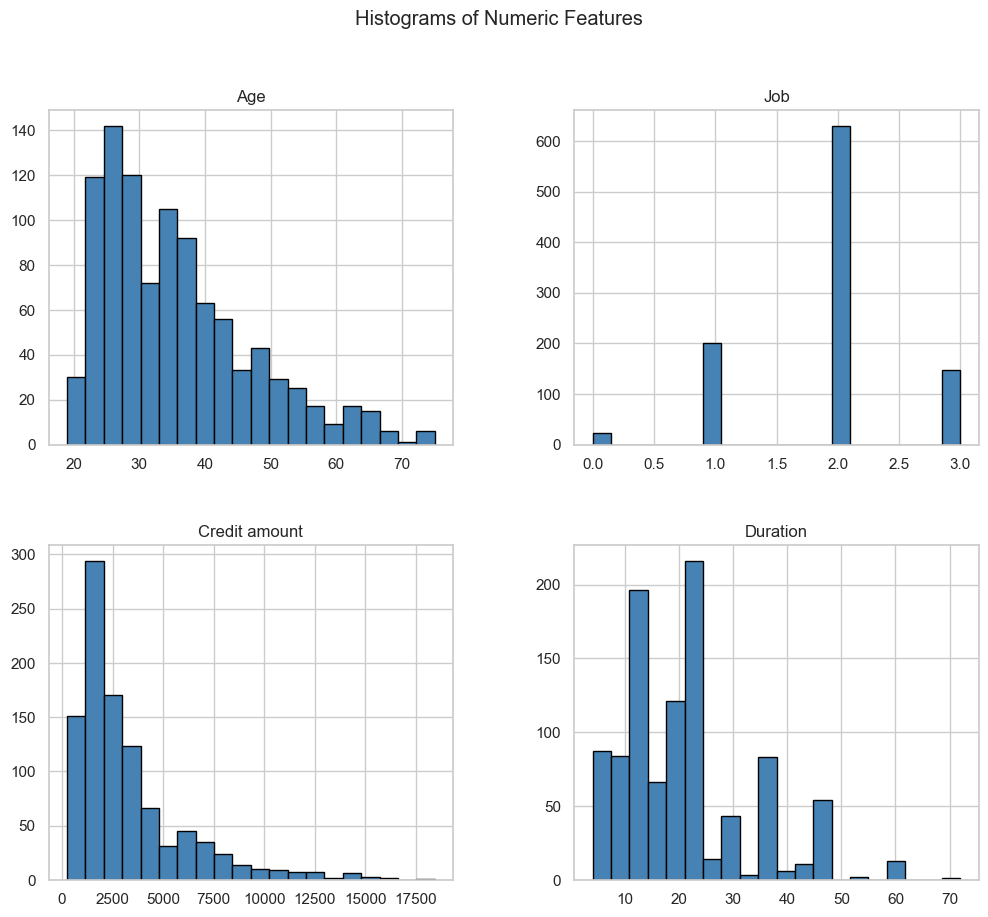

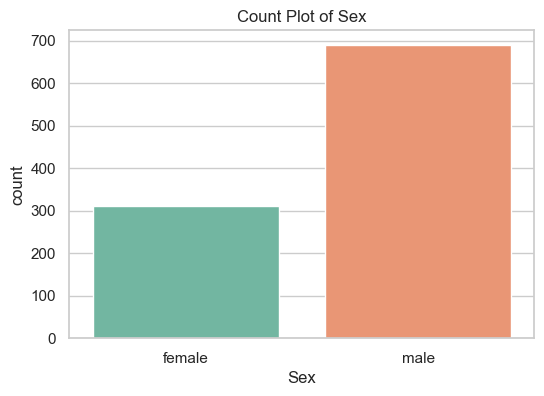

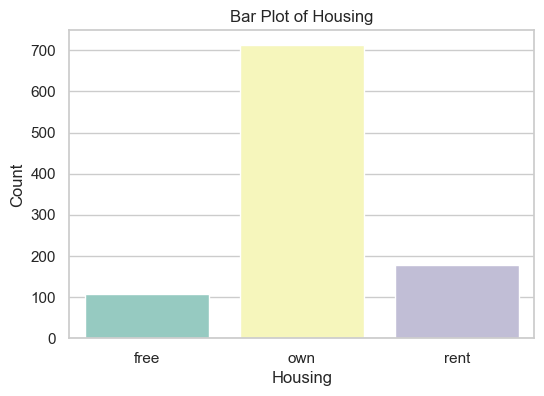

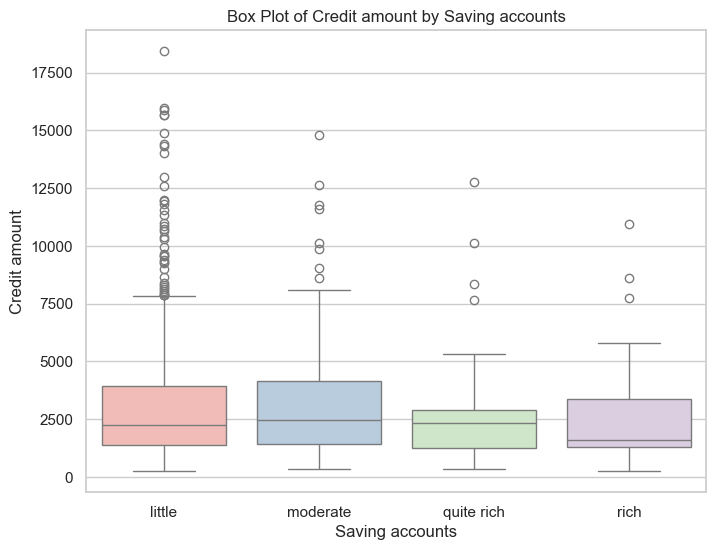

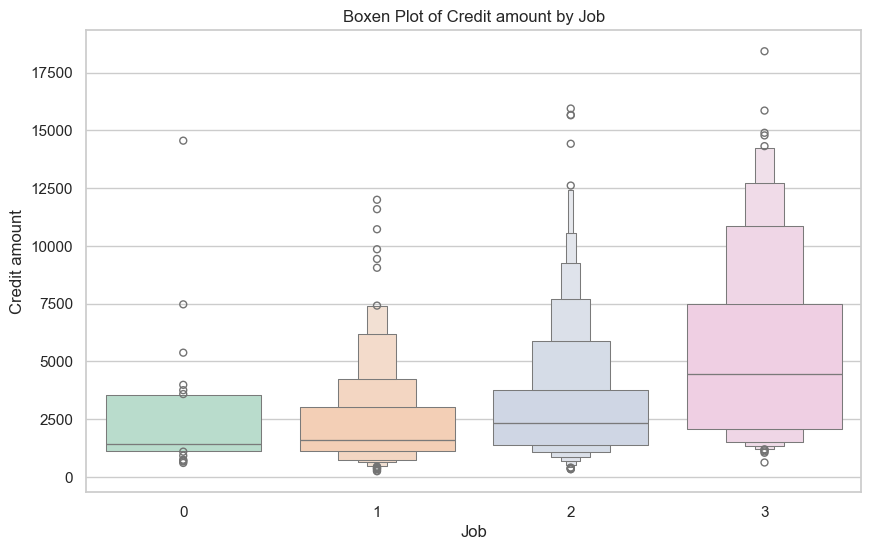

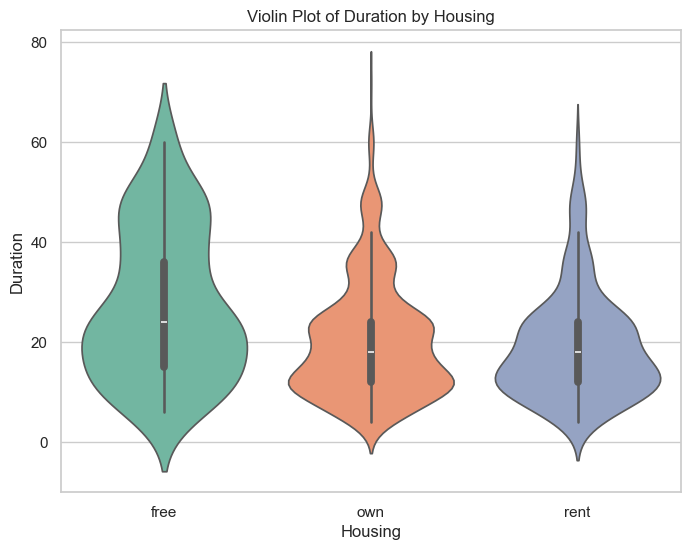

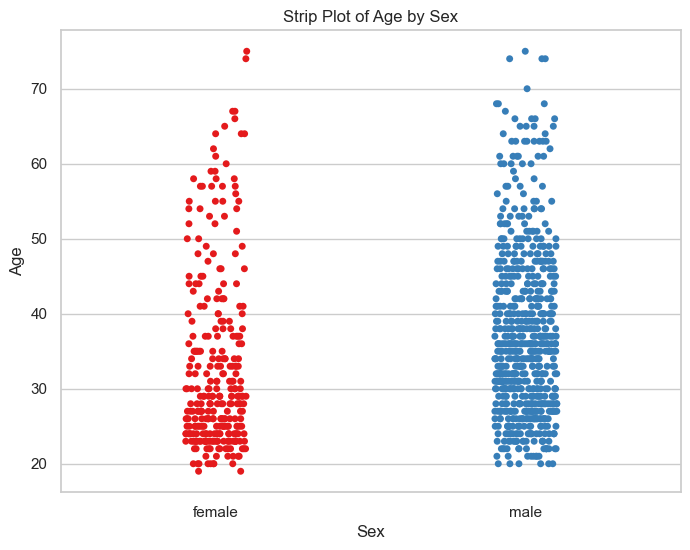

In [4]:
# Numeric columns extraction
numeric_df = df.select_dtypes(include=[np.number])

# If there are 4 or more numeric columns, create a correlation heatmap
if len(numeric_df.columns) >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()

# Pair Plot
sns.pairplot(numeric_df)
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()

# Histograms for numeric columns
numeric_df.hist(figsize=(12, 10), bins=20, color='steelblue', edgecolor='black')
plt.suptitle('Histograms of Numeric Features')
plt.show()

# Count plot for a categorical variable (e.g., Sex)
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=df, palette='Set2')
plt.title('Count Plot of Sex')
plt.show()

# Bar plot of Housing counts grouped by Sex
plt.figure(figsize=(6, 4))
sns.barplot(x='Housing', y=np.ones(len(df)), data=df, estimator=lambda x: len(x), ci=None, palette='Set3')
plt.title('Bar Plot of Housing')
plt.ylabel('Count')
plt.show()

# Box Plot for Credit amount across different Saving accounts categories
plt.figure(figsize=(8, 6))
sns.boxplot(x='Saving accounts', y='Credit amount', data=df, palette='Pastel1')
plt.title('Box Plot of Credit amount by Saving accounts')
plt.show()

# Boxen Plot for Credit amount across different Job categories
plt.figure(figsize=(10, 6))
sns.boxenplot(x='Job', y='Credit amount', data=df, palette='Pastel2')
plt.title('Boxen Plot of Credit amount by Job')
plt.show()

# Violin Plot for Duration across different Housing statuses
plt.figure(figsize=(8, 6))
sns.violinplot(x='Housing', y='Duration', data=df, palette='Set2')
plt.title('Violin Plot of Duration by Housing')
plt.show()


# Strip Plot for Age grouped by Sex
plt.figure(figsize=(8, 6))
sns.stripplot(x='Sex', y='Age', data=df, jitter=True, palette='Set1')
plt.title('Strip Plot of Age by Sex')
plt.show()

**5. Predictive Modeling**

Although the dataset does not directly provide a target variable for credit risk, we can infer a predictive task. Here, we create a binary target variable 'HighCredit' defined as 1 for credit amounts above the median value and 0 otherwise. This is a common trick in data science to convert continuous values into a classification problem.

We then build a Logistic Regression classifier to predict whether an observation falls into the high credit amount category, evaluate the model, and generate a confusion matrix.

Prediction Accuracy: 0.75


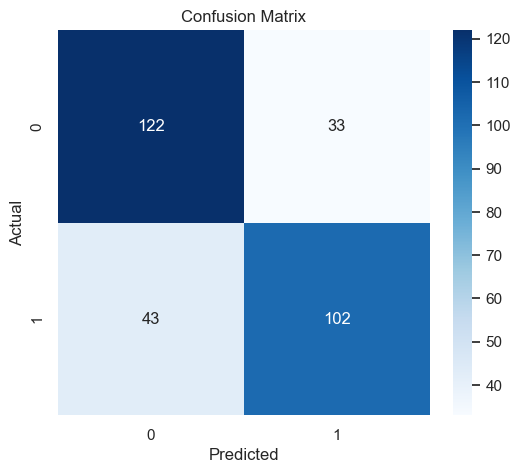

In [5]:
# Create binary target variable 'HighCredit'
median_credit = df['Credit amount'].median()
df['HighCredit'] = (df['Credit amount'] > median_credit).astype(int)

# Prepare features and target
# For simplicity, we will include Age, Job, Duration, and convert categorical variables using one-hot encoding
features = ['Age', 'Job', 'Duration', 'Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
X = df[features]
y = df['HighCredit']

# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print the prediction accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Prediction Accuracy: {accuracy:.2f}')

# Confusion Matrix and its heatmap display
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**6. Conclusion and Future Work**

This notebook provided a comprehensive exploratory analysis of the German Credit dataset. We examined relationships using several visualization techniques, resolved potential data quality issues, and built a classifier to predict whether a credit amount is high or low.

Merits of our approach:

Multiple visualization techniques provided layered insights into the data structure.
Addressed common data cleaning tasks such as dropping unnecessary columns and converting data types.
Demonstrated a method to create a predictive task even when an explicit target was not available.